# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Elementary analysis


In [2]:
#Importing data
data = pd.read_csv('0.housing_prices_data.csv')

In [3]:
#Analyzing the target Variable
#first 10 data points
data['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [4]:
#last 10 data points
data['Sale Price'].tail(10)

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [6]:
#mathematical info
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

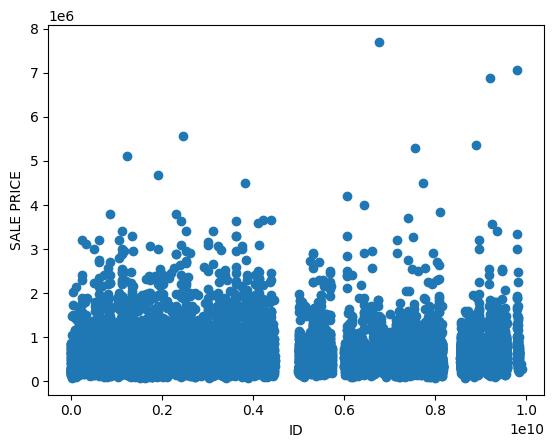

In [7]:
#scatter plot for sale price
plt.scatter(x = data['ID'], y = data['Sale Price'])
plt.xlabel("ID")
plt.ylabel("SALE PRICE")
plt.show()

In [8]:
#taking a look for outliers
import seaborn as sns

<Axes: >

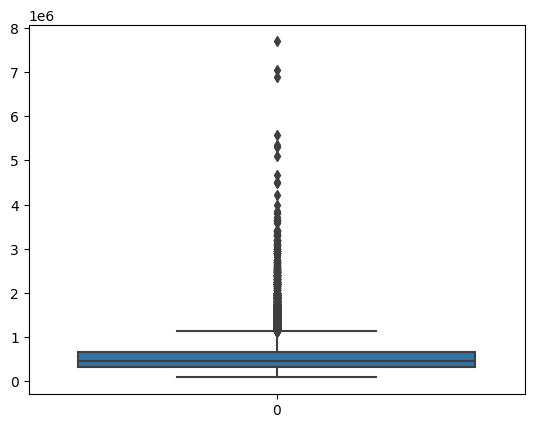

In [9]:
sns.boxplot(data['Sale Price'])

# Target Variable Preprocessing

In [10]:
#calculation of upper and lower limits using quantiles
q1 = data['Sale Price'].quantile(0.25)                #321950.0
q3 = data['Sale Price'].quantile(0.75)                #645000.0
iqr = q3-q1                                           #323050.0
lower_limit = q1 - 1.5 * iqr                          #-162625.0
upper_limit = q3 + 1.5 * iqr                          #1129575.0

In [11]:
#funtion for imputation of outliers
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [12]:
#imputing outlier
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

In [13]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [14]:
#deleting rows of missing values
data.dropna(inplace = True, axis = 0, subset = ['Sale Price'])

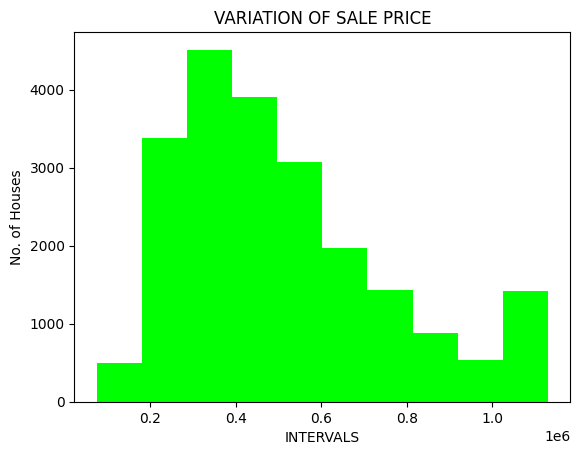

In [15]:
plt.hist(data['Sale Price'] , bins = 10 , color = 'lime')
plt.xlabel('INTERVALS')
plt.ylabel('No. of Houses')
plt.title('VARIATION OF SALE PRICE')
plt.show()

In [16]:
# Saving target imputed data
data.to_csv('1.Target_Imputed_Data.csv',index=False)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

# Independent Numerical variables preprocessing

In [18]:
#imputing numerical columns
numerical_columns = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude','Living Area after Renovation (in Sqft)']

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [21]:
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

In [23]:
data['Zipcode'].shape

(21609,)

In [24]:
# simple imputer expects 2d array but zipcode is 1d
# reshape
column = data['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [25]:
column = data['Zipcode'].values.reshape(-1,1)
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

# Data Transformation

In [27]:
#checking unique values in no of times visited columns
data['No of Times Visited'].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [28]:
# value in No. of times visited are left blank when it is zero, hence filling it with zero.
data['No of Times Visited'].fillna('zero', inplace=True)

In [29]:
data['No of Times Visited'].unique()

array(['zero', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [30]:
#mapping no of times visited so that it can be converted to int type
mapping = {'zero':'0',
           'Thrice': '3',
           'Four': '4',
           'Twice':'2',
           'Once': '1'}

data['No of Times Visited'] = data['No of Times Visited'].map(mapping)

In [31]:
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [32]:
data['No of Times Visited'] = data['No of Times Visited'].astype(int)

In [33]:
data.to_csv("2.Independent_and_Target_Imputed_Data.csv",index=False)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  int32  
 10  Condition of the House     

In [35]:
#creating new columns that are gives better information
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0, 'No','Yes')

In [36]:
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [37]:
data['Years Since Restoration'] = np.where(data['Ever Renovated'] == 'Yes',
                                          abs(data['Purchase Year'] - 
                                             data['Renovated Year']),
                                             0)

In [38]:
data.drop(columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int32  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade              

In [40]:
data.to_csv('3.Transformed_Housing_Data.csv' , index = False)

# Correlation

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int32  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade              

In [42]:
data['Sale Price'].corr(data['Flat Area (in Sqft)'])

0.6951704258420668

In [43]:
np.corrcoef(data['Flat Area (in Sqft)'],data['Sale Price'])

array([[1.        , 0.69517043],
       [0.69517043, 1.        ]])

In [44]:
x = data.copy()

In [45]:
x.drop(columns = ['ID','Waterfront View','Condition of the House','Ever Renovated'] ,inplace = True)

In [46]:
x.corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Restoration
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,-0.064306,-0.043047,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,-0.000901
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.084830,0.006162,-0.078453,0.280452,0.072561,0.093546
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.074933,0.110451,-0.144822,0.200302,0.017263,0.029158


# Categorical variable Preprocessing

In [47]:
data["Condition of the House"].head()

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
Name: Condition of the House, dtype: object

In [48]:
data['Condition of the House'].value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

<Axes: xlabel='Condition of the House'>

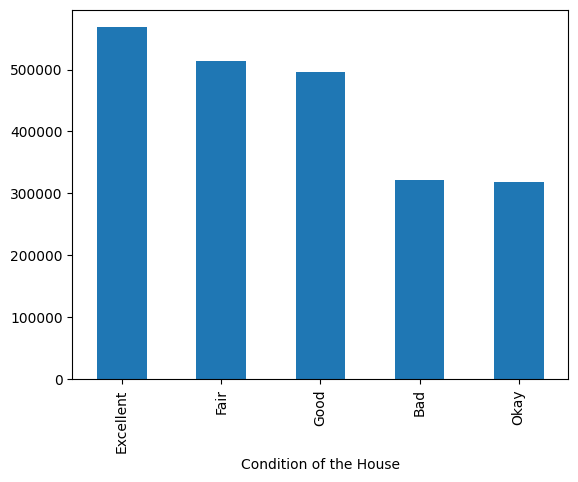

In [49]:
#calculating mean sale price per condition of house
data.groupby('Condition of the House')['Sale Price'].mean().sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='Waterfront View'>

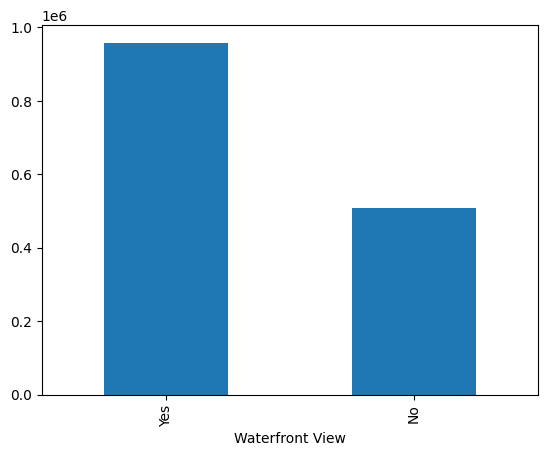

In [50]:
data.groupby('Waterfront View')['Sale Price'].mean().sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='Ever Renovated'>

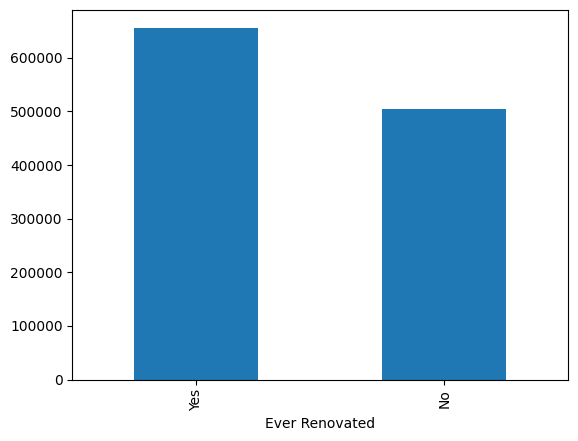

In [51]:
data.groupby('Ever Renovated')['Sale Price'].mean().sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='Zipcode'>

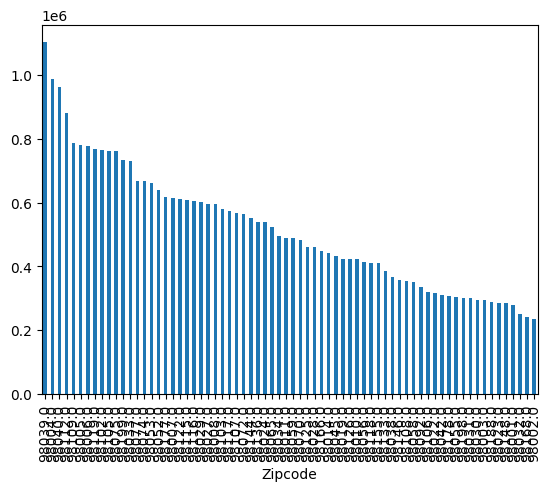

In [52]:
data.groupby('Zipcode')['Sale Price'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [53]:
data['Zipcode'] = data['Zipcode'].astype(object)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int32  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade              

# Anova - gives correlation between categorial variables and target variable

In [55]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [56]:
data = data.rename(columns = {'Sale Price' : 'Sale_Price','Waterfront View':'Waterfront_View','Condition of the House':'Condition_of_the_House','Ever Renovated':'Ever_Renovated'})

In [57]:
mod = ols('Sale_Price ~ Condition_of_the_House',data = data).fit()

In [58]:
sm.stats.anova_lm(mod,typ = 2)

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


In [59]:
mod = ols('Sale_Price ~ Waterfront_View',data = data).fit()
sm.stats.anova_lm(mod,typ = 2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [60]:
mod = ols('Sale_Price ~ Ever_Renovated',data = data).fit()
sm.stats.anova_lm(mod,typ = 2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [61]:
mod = ols('Sale_Price ~ Zipcode',data = data).fit()
sm.stats.anova_lm(mod,typ = 2)

,sum_sq,df,F,PR(>F)
Zipcode,6.859657e+14,69.0,321.902033,0.0
Residual,6.652044e+14,21539.0,NaN,NaN


# Dummy Variables

In [62]:
data = pd.get_dummies(data,columns = ['Condition_of_the_House','Ever_Renovated','Waterfront_View'],drop_first = True)

In [63]:
data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Restoration,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,-122.257,1340.0,5650,0,False,True,False,False,False,False
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,-122.319,1690.0,7639,26,False,True,False,False,True,False
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,-122.233,2720.0,8062,0,False,True,False,False,False,False
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,-122.393,1360.0,5000,0,True,False,False,False,False,False
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,-122.045,1800.0,7503,0,False,True,False,False,False,False


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale_Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   No of Times Visited                        21609 non-null  int32  
 8   Overall Grade                              21609 non-null  int64  
 9   Area of the House from Basement (in Sqft)  21609 non-null  float64
 10  Basement Area (in Sqft)    

In [65]:
zip_table = data.groupby('Zipcode').agg({'Sale_Price': 'mean'}).sort_values('Sale_Price')

In [66]:
zip_table

,Sale_Price
Zipcode,
98002.0,2.342840e+05
98168.0,2.403284e+05
98032.0,2.512962e+05
98001.0,2.808047e+05
98148.0,2.849086e+05
...,...
98109.0,7.876028e+05
98112.0,8.807990e+05
98040.0,9.621087e+05


In [67]:
zip_table['Zipcode_Group'] = pd.cut(zip_table['Sale_Price'],bins = 10,
                                   labels = ['Zipcode_Group0',
                                            'Zipcode_Group1',
                                            'Zipcode_Group2',
                                            'Zipcode_Group3',
                                            'Zipcode_Group4',
                                            'Zipcode_Group5',
                                            'Zipcode_Group6',
                                            'Zipcode_Group7',
                                            'Zipcode_Group8',
                                            'Zipcode_Group9'],
                                   include_lowest = True)

In [68]:
zip_table = zip_table.drop(columns = 'Sale_Price')

In [69]:
data = pd.merge(data,
               zip_table,
               left_on = 'Zipcode',
               how = 'left',
               right_index = True)

In [70]:
data = data.drop(columns = 'Zipcode')

In [71]:
data = pd.get_dummies(data,columns = ['Zipcode_Group'],drop_first = True)


In [72]:
data = data.drop(columns = 'ID')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int32  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years)    

In [74]:
data.head(10)

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,False,False,True,False,False,False,False,False,False,False
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,False,False,True,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,False,False,False,True,False,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,False,False,False,False,True,False,False,False,False,False
5,1129575.0,4,4.50,5420.0,101930.0,1.0,0,10,3890.0,1530,...,False,False,False,False,True,False,False,False,False,False
6,257500.0,3,2.25,1715.0,6819.0,2.0,0,7,1715.0,0,...,False,False,False,False,False,False,False,False,False,False
7,291850.0,3,1.50,1060.0,9711.0,1.0,0,7,1060.0,0,...,False,False,False,False,False,False,False,False,False,False
8,229500.0,3,1.00,1780.0,7470.0,1.0,0,7,1050.0,730,...,False,True,False,False,False,False,False,False,False,False
9,323000.0,3,2.50,1890.0,6560.0,2.0,0,7,1890.0,0,...,False,True,False,False,False,False,False,False,False,False


In [75]:
data.to_csv('4.Categorical_Variable_Processed_Data.csv')

# test train splitting

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
#target vairiable
Y = data.iloc[:,0]

In [78]:
#independent variable
X = data.iloc[:,1:31]

In [79]:
X

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,False,False,False,False,False,False,False,False,False,False
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,False,False,True,False,False,False,False,False,False,False
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,False,False,True,False,False,False,False,False,False,False
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,False,False,False,True,False,False,False,False,False,False
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,9,...,False,False,False,True,False,False,False,False,False,False
21609,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,4,...,False,True,False,False,False,False,False,False,False,False
21610,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,9,...,False,False,False,True,False,False,False,False,False,False
21611,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,14,...,False,False,False,False,True,False,False,False,False,False


In [80]:
Y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: Sale_Price, Length: 21609, dtype: float64

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.3)

In [82]:
X_train.shape

(15126, 30)

In [83]:
Y_train.shape

(15126,)

In [84]:
X_test.shape

(6483, 30)

In [85]:
Y_test.shape

(6483,)

# Feature scaling

In [86]:
from sklearn import preprocessing

In [87]:
# using standardisation scaling

In [88]:
scale = preprocessing.StandardScaler()

In [89]:
X_train = scale.fit_transform(X_train)

In [90]:
X_test = scale.fit_transform(X_test)

In [91]:
X_train

array([[-0.395344  , -0.80488112, -1.10650581, ..., -0.11278716,
        -0.16691564, -0.04068808],
       [-0.395344  , -0.48093264, -0.47926984, ..., -0.11278716,
        -0.16691564, -0.04068808],
       [ 1.73883633,  0.49091281,  1.83501463, ..., -0.11278716,
        -0.16691564, -0.04068808],
       ...,
       [ 0.67174617,  0.49091281,  0.78601653, ..., -0.11278716,
        -0.16691564, -0.04068808],
       [ 0.67174617,  0.16696432, -0.68474369, ..., -0.11278716,
        -0.16691564, -0.04068808],
       [-1.46243416, -1.45277809, -0.82533107, ..., -0.11278716,
        -0.16691564, -0.04068808]])

In [92]:
X_test

array([[ 0.68861871,  0.52260068,  1.23756701, ..., -0.11106773,
        -0.17328762, -0.06221871],
       [-1.50245618, -0.78286901,  0.06403196, ..., -0.11106773,
        -0.17328762, -0.06221871],
       [-0.40691874, -1.43560386, -0.96557898, ..., -0.11106773,
        -0.17328762, -0.06221871],
       ...,
       [ 0.68861871,  1.82807038,  2.04575624, ..., -0.11106773,
        -0.17328762, -0.06221871],
       [-1.50245618,  0.19623326, -0.20167409, ..., -0.11106773,
        -0.17328762, -0.06221871],
       [-0.40691874, -0.45650159, -1.1759296 , ..., -0.11106773,
        -0.17328762, -0.06221871]])

# Mean Regression

In [93]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

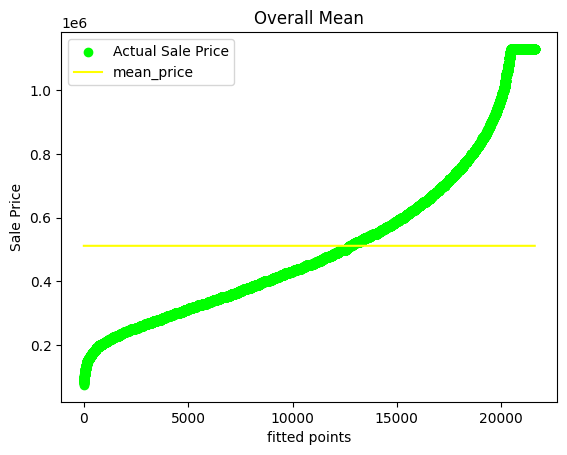

In [94]:
plt.figure(dpi = 100)
k = range(0,len(data))
plt.scatter(k,data['Sale_Price'].sort_values(),color = 'lime', label = 'Actual Sale Price')
plt.plot(k,data['mean_sales'], color = 'yellow',label = 'mean_price')
plt.xlabel('fitted points')
plt.ylabel('Sale Price')
plt.title('Overall Mean')
plt.legend()

In [95]:
#Mean regression with respect to overall grade

In [96]:
data["Overall Grade"].unique()

array([ 7,  6,  8, 10,  9,  5,  4,  3,  2,  1], dtype=int64)

In [97]:
grades_mean = data.pivot_table(values = 'Sale_Price' , columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [98]:
# making new column
data['grade_mean'] = 0

# for every grade fill its mean price in new column
for i in grades_mean.columns:
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
  
data['grade_mean'].head()

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [99]:
gradewise_list = []
for i in range(1,11):
  k = data["Sale_Price"][data["Overall Grade"] == i]
  gradewise_list.append(k)

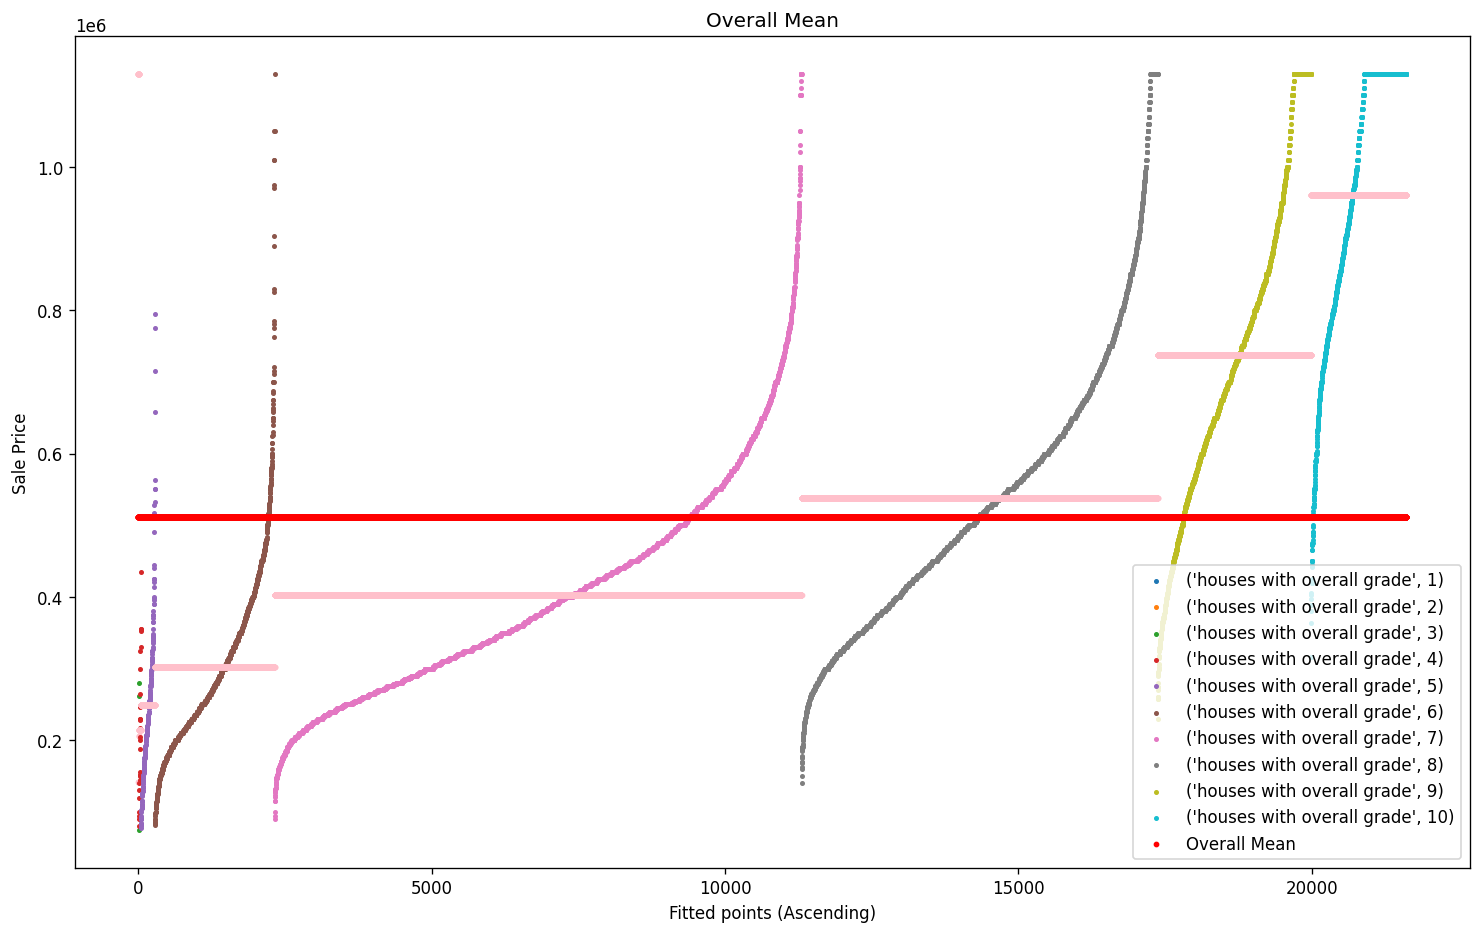

In [100]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # Plotting
  plt.scatter( points,
              gradewise_list[i-1].sort_values(),
              label = ('houses with overall grade', i), s = 4 )
  # Plotting gradewise mean
  plt.scatter( points,
              [gradewise_list[i-1].mean() for q in range(len(gradewise_list[i-1]))],
              s = 6, color = 'pink'
              )          
  z = max(points) + 1

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         data['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend(loc = 4)

In [101]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

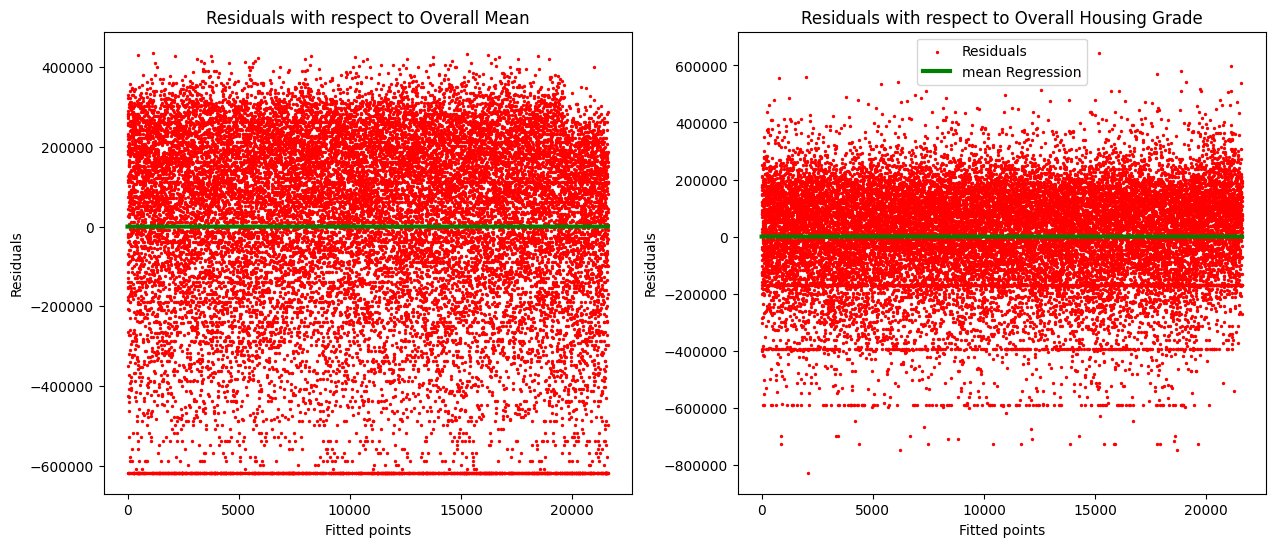

In [102]:
k = range(0, len(data))
l = [0 for i in range(len(data))]

plt.figure( figsize = (15,6), dpi =100)

plt.subplot(1,2,1)
plt.scatter( k , mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')

plt.subplot(1,2,2)
plt.scatter( k , grade_mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals with respect to Overall Housing Grade")

plt.legend()

In [103]:
mean_error = sum(mean_difference)/len(data)
print(round(mean_error, 7))

0.0


In [104]:
Y = data["Sale_Price"]
Y_hat1 = data["mean_sales"]
Y_hat2 = data['grade_mean']
n = len(data)

len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [105]:
#error in mean regression model
mean_absolute_error1 = sum(abs(Y_hat1 - Y))/n
mean_absolute_error1

199168.78146839526

In [106]:
#error in categorical mean regression model
mean_absolute_error2 = sum(abs(Y_hat2 - Y))/n
mean_absolute_error2

137081.70298203363

In [107]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error_2 = mean_absolute_error(Y_hat2, Y)
mean_absolute_error_2

137081.7029820291

In [108]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error( Y_hat1, Y)
mse2 = mean_squared_error(Y_hat2, Y)
mse1, mse2

(62528116847.799576, 30804835720.342426)

In [109]:
from sklearn.metrics import mean_squared_error
rmse1 = mean_squared_error( Y_hat1, Y)**0.5
rmse2 = mean_squared_error(Y_hat2, Y)**0.5
rmse1, rmse2

(250056.2273725643, 175513.06424406826)

In [110]:
mse_mean = mean_squared_error( Y_hat1, Y)
mse_mean

62528116847.799576

In [111]:
mse_model = mean_squared_error( Y_hat2, Y)
mse_model

30804835720.342426

In [112]:
R2 = 1 - (mse_model / mse_mean)
R2

0.5073442592981836

In [113]:
from sklearn.metrics import r2_score
score = r2_score(Y, Y_hat2)
score

0.5073442592981836

# LINEAR REGRESSION

In [114]:
# data.head()

In [115]:
# sale_price = data["Sale_Price"].head(30)
# flat_area = data['Flat Area (in Sqft)'].head(30)
# sample_data = pd.DataFrame({ 'sale_price': sale_price,
#                               'flat_area': flat_area})
# sample_data

In [116]:
# plt.figure( dpi = 150)
# plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red', label = 'sale_price')
# plt.xlabel('Flat_Area')
# plt.ylabel('Sale_Price')
# plt.title("Sale_Price/Flat_Area")
# plt.legend()
# plt.show()

In [117]:
# sample_data['mean_sale_price'] = sample_data.sale_price.mean()


# plt.figure( dpi = 150)
# plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red')
# plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color = "yellow", label = 'Mean Sale Price')
# plt.xlabel('Flat_Area')
# plt.ylabel('Sale_Price')
# plt.title("Sale_Price/Flat_Area")
# plt.legend()
# plt.show()

In [118]:
# c = 0
# m = 0

# line = []

# for i in range(len(sample_data)):
#     line.append(sample_data.flat_area[i] * m + c)

# plt.figure(dpi = 130)
# plt.scatter(sample_data.flat_area, sample_data.sale_price)
# plt.plot(sample_data.flat_area, line, label = 'm = 0.0; c = 0')
# plt.xlabel('Flat_Area')
# plt.ylabel('Sale_Price')
# plt.legend()
# MSE = mean_squared_error(sample_data.sale_price, line)
# plt.title("Slope "+str(m)+" with MSE "+ str(MSE))

In [119]:
# c = 0
# m = 50

# line = []

# for i in range(len(sample_data)):
#     line.append(sample_data.flat_area[i] * m + c)

# plt.figure(dpi = 130)
# plt.scatter(sample_data.flat_area, sample_data.sale_price)
# plt.plot(sample_data.flat_area, line, label = 'm = 50; c = 0')
# plt.xlabel('Flat_Area')
# plt.ylabel('Sale_Price')
# plt.legend()
# MSE = mean_squared_error(sample_data.sale_price, line)
# plt.title("Slope "+str(m)+" with MSE "+ str(MSE))

In [120]:
# def slope_Error( slope, intercept ,  sample_data):
#     sale = []
#     for i in range(len(sample_data.flat_area)):
#         tmp = sample_data.flat_area[i] * slope + intercept
#         sale.append(tmp)
#     MSE = mean_squared_error(sample_data.sale_price, sale)
#     return MSE

In [121]:
# slope = [i/10 for i in range(0,5000)]
# Cost = []
# for i in slope:
#     cost = slope_Error( slope = i, intercept = 0, sample_data = sample_data)
#     Cost.append(cost)

In [122]:
# # Arranging in DataFrame
# Cost_table = pd.DataFrame({
#     'slope' : slope,
#     'Cost' : Cost
# })
# Cost_table.tail()

In [123]:
# # plotting the cost values corresponding to every value of Beta
# plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
# plt.xlabel('Value of slope')
# plt.ylabel('Cost')
# plt.legend()

In [124]:
# new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
# new_slope[0]

In [125]:
# def intercept_Error( slope, intercept ,  sample_data):
#     sale = []
#     for i in range(len(sample_data.flat_area)):
#         tmp = sample_data.flat_area[i] * slope + intercept
#         sale.append(tmp)
#     MSE = mean_squared_error(sample_data.sale_price, sale)
#     return MSE

In [126]:
# intercept = [i for i in range(5000,50000)]
# Cost = []
# for i in intercept:
#     cost = intercept_Error( slope = 234, intercept = i, sample_data = sample_data)
#     Cost.append(cost)

In [127]:
# # Arranging in DataFrame
# Cost_table = pd.DataFrame({
#     'intercept' : intercept,
#     'Cost' : Cost
# })
# Cost_table.head()

In [128]:
# # plotting the cost values corresponding to every value of Beta
# plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
# plt.xlabel('Value of intercept')
# plt.ylabel('Cost')
# plt.legend()

In [129]:
# new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
# new_intercept[0]

In [130]:
# slope = [i/10 for i in range(0,5000)]
# Cost = []
# for i in slope:
#     cost = slope_Error( slope = i, intercept = 10834, sample_data = sample_data)
#     Cost.append(cost)

In [131]:
# # Arranging in DataFrame
# Cost_table = pd.DataFrame({
#     'slope' : slope,
#     'Cost' : Cost
# })
# Cost_table.tail()

In [132]:
# # plotting the cost values corresponding to every value of Beta
# plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
# plt.xlabel('Value of slope')
# plt.ylabel('Cost')
# plt.legend()

In [133]:
# new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
# new_slope[0]

In [134]:
# intercept = [i for i in range(5000,50000)]
# Cost = []
# for i in intercept:
#     cost = intercept_Error( slope = 229.7, intercept = i, sample_data = sample_data)
#     Cost.append(cost)

In [135]:
# # Arranging in DataFrame
# Cost_table = pd.DataFrame({
#     'intercept' : intercept,
#     'Cost' : Cost
# })
# Cost_table.head()

In [136]:
# # plotting the cost values corresponding to every value of Beta
# plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
# plt.xlabel('Value of intercept')
# plt.ylabel('Cost')
# plt.legend()

In [137]:
# new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
# new_intercept[0]

In [138]:
# data.head()

In [139]:
# sale_price = data["Sale_Price"].head(30)
# flat_area = data['Flat Area (in Sqft)'].head(30)
# sample_data = pd.DataFrame({ 'sale_price': sale_price,
#                               'flat_area': flat_area})
# sample_data.head()

# Gradient Descent

In [140]:
# def param_init(Y):
#   '''
#   Y = target variable
#   returns initialized values of m and c
#   '''
#   m = 0.1
#   c = Y.mean()
#   return m, c

In [141]:
# def generate_predictions(m, c, X):
#   '''
#   X = independent variable
#   returns prediction generated by line with parameters m, c
#   '''
#   prediction = []
#   for x in X:
#     pred = (m * x) + c
#     prediction.append(pred)
#   return prediction

In [142]:
# def compute_cost(prediction, Y):
#   '''
#   returns the mean_squared_error between prediction and Y
#   '''
#   cost = np.sum(((prediction - Y)**2)/len(Y))
#   return cost

In [143]:
# def gradients(prediction, Y, X):
#   '''
#   Returns Gradients corresponding to m and c
#   '''
#   n = len(Y)
#   Gm = 2/n * np.sum((prediction - Y) * X)
#   Gc = 2/n * np.sum((prediction - Y))
#   return Gm, Gc

In [144]:
# def param_update(m_old , c_old , Gm_old, Gc_old, alpha):
#   '''
#   Update and return the new values of m and c
#   '''
#   m_new = m_old - alpha * Gm_old
#   c_new = c_old - alpha * Gc_old
#   return m_new, c_new

In [145]:
# def result(m, c, X, Y, cost, predictions, i):
#   '''
#   Print and plot the final result obtained from gradient descent
#   '''
#   ##If the Gradient Descent converged to the optimum value before max_iter
#   if i < max_iter - 1 :
#     print("***** Gradient Descent has converged at iteration {} *****".format(i))
#   else:
#     print("***** Result after", max_iter,'iterations is: *****')
  
#   ## plotting the final result
#   plt.figure(figsize = (14,7), dpi = 120)
#   plt.scatter(X, Y, color = 'red', label = 'data points')
#   label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
#   plt.plot(X, predictions, color = 'green', label = label)
#   plt.xlabel('flat_area')
#   plt.ylabel('sale_price')
#   plt.title('final regression line')
#   plt.legend()

In [146]:
# ## defining and reshaping the dataset
# sale_price = sample_data['sale_price'].values.reshape(-1,1)
# flat_area = sample_data['flat_area'].values.reshape(-1,1)

# ## declaring parameters
# max_iter = 1000
# cost_old = 0
# alpha = 0.01

# ## Step 1: inititialising the values of m, c
# m , c = param_init(sale_price)

# ## Gradient Descent in action
# for i in range(0 , max_iter):
  
#   ## Step 2: genrating predictions
#   predictions = generate_predictions(m , c , flat_area)

#   ## Step 3: calculating cost
#   cost_new = compute_cost(predictions , sale_price)

#   ## checking if GD converged
#   if abs(cost_new - cost_old) < 10**(-7):
#     break
  
#   ## calculating gradients
#   Gm, Gc = gradients(predictions, sale_price,
#                      flat_area)
  
#   ## Step 4: updating parameters m and c
#   m, c = param_update(m, c, Gm, Gc, alpha)

#   ## display result after every 20 iterations
#   if i%20 == 0:
#     print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

#   ##updating cost_old
#   cost_old = cost_new

# ## final results
# result(m , c, flat_area, sale_price,
#        cost_new, predictions, i)

In [147]:
# ## scaling the dataset using the standard scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
# flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

# ## declaring parameters
# max_iter = 1000
# cost_old = 0
# alpha = 0.01

# ## Step 1: inititialising the values of m, c
# m , c = param_init(sale_price)

# ## Gradient Descent in action
# for i in range(0 , max_iter):
  
#   ## Step 2: genrating predictions
#   predictions = generate_predictions(m , c , flat_area)

#   ## Step 3: calculating cost
#   cost_new = compute_cost(predictions , sale_price)

#   ## checking if GD converged
#   if abs(cost_new - cost_old) < 10**(-7):
#     break
  
#   ## calculating gradients
#   Gm, Gc = gradients(predictions, sale_price,
#                      flat_area)
  
#   ## Step 4: updating parameters m and c
#   m, c = param_update(m, c, Gm, Gc, alpha)

#   ## display result after every 20 iterations
#   if i%20 == 0:
#     print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

#   ##updating cost_old
#   cost_old = cost_new

# ## final results
# result(m , c, flat_area, sale_price,
#        cost_new, predictions, i)

In [148]:
data.drop(columns = ['mean_sales', 'grade_mean'], inplace = True)

In [149]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,False,False,True,False,False,False,False,False,False,False
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,False,False,True,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,False,False,False,True,False,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,False,False,False,False,True,False,False,False,False,False


# Scaling dataset

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Handling Collinearity

In [151]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [152]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [153]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Restoration                         2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [154]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [155]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [156]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [157]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Restoration                      2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

# Test/Train set

In [158]:
X = vif_data
Y = data['Sale_Price']

In [159]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

In [160]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [161]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [162]:
predictions = lr.predict(x_test)

In [163]:
lr.score(x_test, y_test)

0.8461987715586199

# Verifying assumptions

In [164]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [165]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

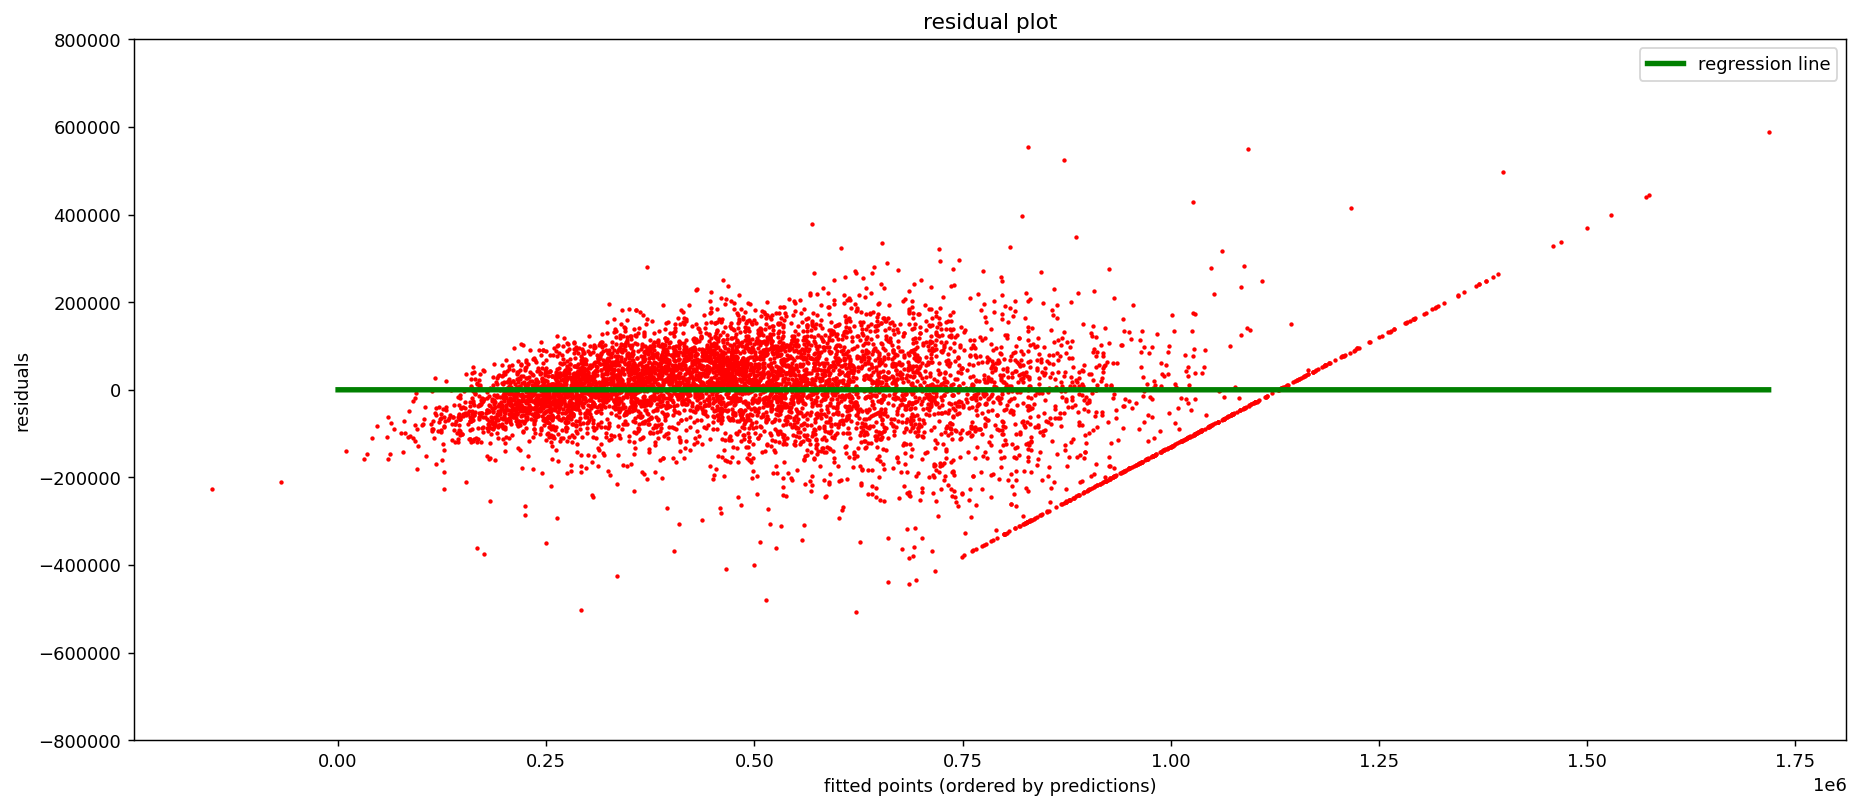

In [166]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

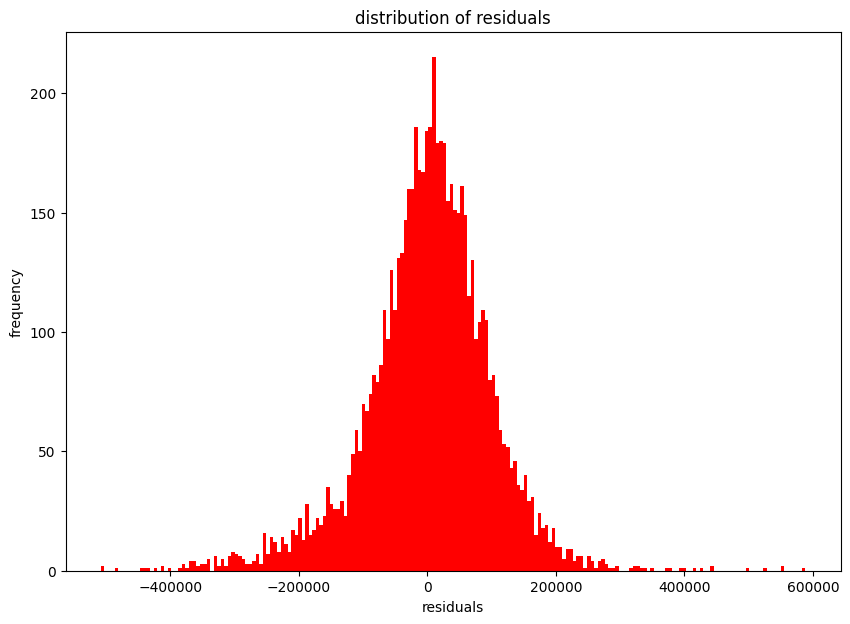

In [167]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

In [168]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')

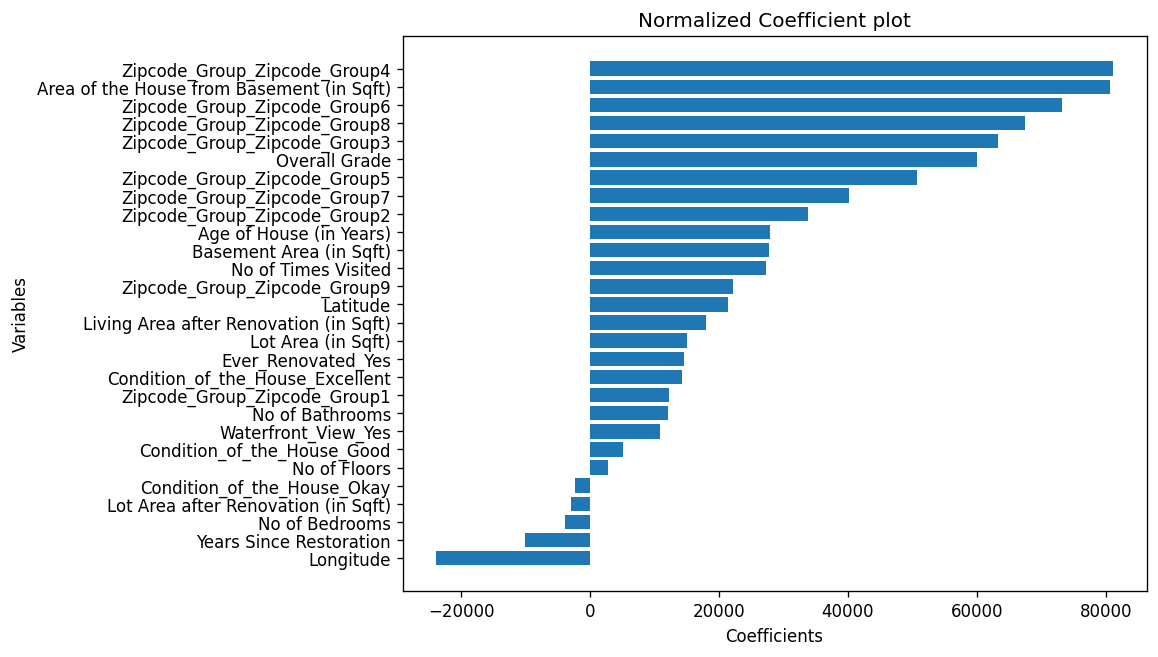

In [169]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()